In [1]:
#importing required librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [2]:
#reading the given csv file
urd = pd.read_csv("Uber Request Data.csv")

In [3]:
urd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
urd.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#converting "Request timestamp" from string to date_time object 
urd["Request timestamp"] = pd.to_datetime(urd["Request timestamp"])

In [6]:
#converting "Drop timestamp" from string to date_time object 
urd["Drop timestamp"] = pd.to_datetime(urd["Drop timestamp"])

In [7]:
urd.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
#finding the number of entries whose trips from airport that  has been completed 
urd[(urd["Status"] == "Trip Completed") &(urd["Pickup point"]=="Airport")].count()

Request id           1327
Pickup point         1327
Driver id            1327
Status               1327
Request timestamp    1327
Drop timestamp       1327
dtype: int64

In [9]:
#finding the number of entries whose trips from city that has been completed 
urd[(urd["Status"] == "Trip Completed") &(urd["Pickup point"]=="City")].count()

Request id           1504
Pickup point         1504
Driver id            1504
Status               1504
Request timestamp    1504
Drop timestamp       1504
dtype: int64

In [10]:
#finding the number of entries whose trips from airport that has been cancelled
urd[(urd["Status"]== "Cancelled") & (urd["Pickup point"]=="Airport")].count()

Request id           198
Pickup point         198
Driver id            198
Status               198
Request timestamp    198
Drop timestamp         0
dtype: int64

In [11]:
#finding the number of entries whose trips from city that has been cancelled
urd[(urd["Status"] == "Cancelled") &(urd["Pickup point"]=="City")].count()

Request id           1066
Pickup point         1066
Driver id            1066
Status               1066
Request timestamp    1066
Drop timestamp          0
dtype: int64

In [12]:
#finding the number of entries whose trips from airport and whose status was No cars available.
urd[(urd["Status"]== "No Cars Available") & (urd["Pickup point"]=="Airport")].count()

Request id           1713
Pickup point         1713
Driver id               0
Status               1713
Request timestamp    1713
Drop timestamp          0
dtype: int64

In [13]:
#finding the number of entries whose trips from city and whose status was No cars available.
urd[(urd["Status"]== "No Cars Available") & (urd["Pickup point"]=="City")].count()

Request id           937
Pickup point         937
Driver id              0
Status               937
Request timestamp    937
Drop timestamp         0
dtype: int64

In [14]:
#creating an array of unique entries in Status column
status = urd["Status"].unique()
status

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [15]:
from_airport = [1327,198,1713]
from_city = [1504,1066,973]
X = np.arange(len(from_airport))

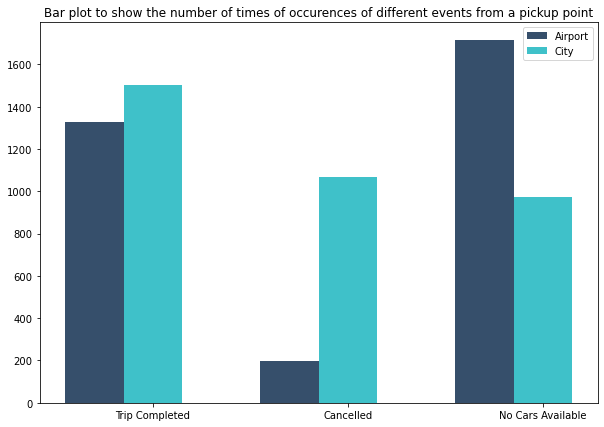

In [16]:
plt.figure(figsize=[10,7])
plt.bar(X,from_airport, color = "#364F6B", width = 0.3)
plt.bar(X +0.3 , from_city, color = "#3FC1C9", width = 0.3)
plt.xticks([i + 0.3 for i in range(3)], status)
plt.legend(['Airport','City'])
plt.title("Bar plot to show the number of times of occurences of different events from a pickup point")
plt.show()

<ul>
<li>We can see from the graph that sum of 
‘cancelled’ and ‘no cars available’ is almost 
equal to twice of ‘completed trips’.<br>
So it appears that more than 50% of trips are 
    not happening.</li>
<li>Number of cancellation of trips from City to 
Airport are more than from Airport to city. 
This is because Drivers would never leave 
empty from airport to city as it would be loss 
    for them</li>
<li>More number of drivers cancel the trip from 
    city to airport.</li>
<li>Which is the cause for the more number of 
    cars not available at the airport.</li>
</ul>

In [17]:
urd["Hour"] = urd["Request timestamp"].dt.hour

In [18]:
def daytimeagg(hour):
    if hour >= 3 and hour<= 7:
        return "Early Morning"
    elif hour >= 8 and hour <= 11:
        return "Morning"
    elif hour >= 12 and hour <= 15:
        return "Afternoon"
    elif hour >= 16 and hour <= 19:
        return "Evening"
    elif hour >= 20:
        return "Night"
    elif hour <= 2:
        return "Night"
    

In [19]:
urd["Daytime"] = urd.apply(lambda row : daytimeagg(row["Hour"]),axis = 1)
urd.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Daytime
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [20]:
urd[(urd["Status"] == "Cancelled") & (urd["Pickup point"] == "Airport")]["Daytime"].value_counts()

Evening          63
Night            60
Afternoon        36
Morning          24
Early Morning    15
Name: Daytime, dtype: int64

In [21]:
urd[(urd["Status"] == "Cancelled") & (urd["Pickup point"] == "City")]["Daytime"].value_counts()

Early Morning    528
Morning          406
Night             57
Evening           42
Afternoon         33
Name: Daytime, dtype: int64

In [22]:
urd[(urd["Status"] == "No Cars Available" ) &(urd["Pickup point"] == "Airport") ]["Daytime"].value_counts()

Evening          801
Night            749
Early Morning     74
Afternoon         55
Morning           34
Name: Daytime, dtype: int64

In [23]:
urd[(urd["Status"] == "No Cars Available" ) &(urd["Pickup point"] == "City") ]["Daytime"].value_counts()

Early Morning    289
Morning          245
Night            194
Afternoon        127
Evening           82
Name: Daytime, dtype: int64

In [24]:
urd[(urd["Status"] == "Trip Completed" ) &(urd["Pickup point"] == "Airport") ]["Daytime"].value_counts()

Night            329
Early Morning    292
Evening          276
Morning          243
Afternoon        187
Name: Daytime, dtype: int64

In [25]:
urd[(urd["Status"] == "Trip Completed" ) &(urd["Pickup point"] == "City")]["Daytime"].value_counts()

Early Morning    346
Night            333
Morning          316
Evening          296
Afternoon        213
Name: Daytime, dtype: int64

In [26]:
daytime_grp = ['Early Morning (03-07)','Morning(08-11)','Afternoon(12-15)', 'Evening(16-19)', 'Night(20-02)']

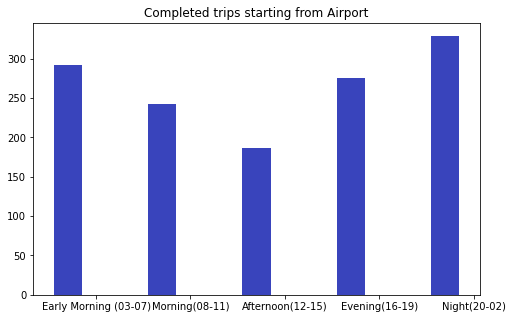

In [27]:
tc_air = [292,243,187,276,329]
x = np.arange(len(tc_air))
plt.figure(figsize= [8,5])
plt.bar(x, tc_air, color = "#3944BC", width =0.3)
#plt.bar(x + 0.3, tc_city, color = "#A42838",width = 0.3)
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
#plt.legend(["Cancelled","No Cars Available "])
plt.title("Completed trips starting from Airport")
plt.show()

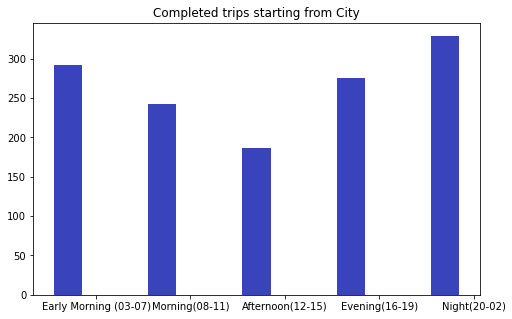

In [28]:
tc_city = [346,316,213,296,333]
plt.figure(figsize= [8,5])
plt.bar(x, tc_air, color = "#3944BC", width =0.3)
#plt.bar(x + 0.3, tc_city, color = "#A42838",width = 0.3)
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
#plt.legend(["Cancelled","No Cars Available "])
plt.title("Completed trips starting from City")
plt.show()

<ul>
    <li>Approximately 300+250 = 550 rides were
        completed in the same time slot.</li>
    <li>Only 26.82% rides were completed where as the
        remaining 73.17% rides did not happen which
        tends to a great loss for the company.</li>
</ul>

In [29]:
cncld_air = [15,24,36,63,60]
no_cars_avail_air = [74,34,55,801,749]
cncld_city =[528,406,33,42,57]
no_cars_avail_city = [289,245,127,82,194]
x = np.arange(len(cncld_air))


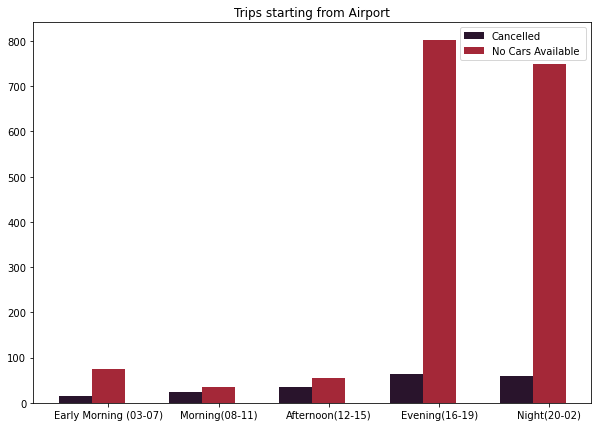

In [30]:
plt.figure(figsize= [10,7])
plt.bar(x, cncld_air, color = "#29142C", width =0.3)
plt.bar(x + 0.3, no_cars_avail_air, color = "#A42838",width = 0.3)
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
plt.legend(["Cancelled","No Cars Available "])
plt.title("Trips starting from Airport")
plt.show()

<ul>
    <li>We can see that there is a high number of no 
        cars available event at evening and night.</li>
    <li> There are little more number of cancellations 
    at evening and night than till afternoon.</li>
    <li>There are more number of flights landing at 
    evening and night which could increase the 
    revenue if the cab drivers are available at the 
    Airport</li>
</ul>
    

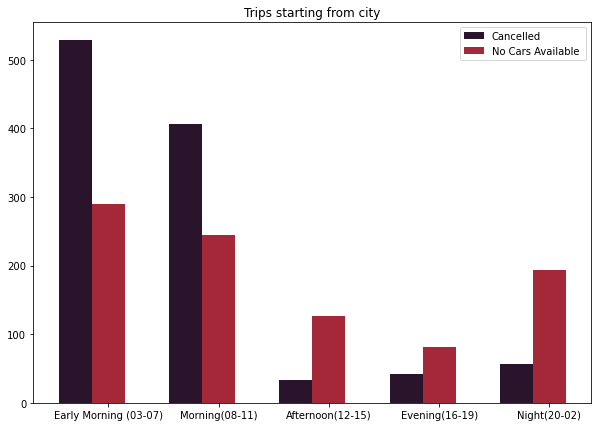

In [31]:

plt.figure(figsize= [10,7])
plt.bar(x, cncld_city, color = "#29142C", width =0.3)
plt.bar(x + 0.3, no_cars_avail_city, color = "#A42838",width = 0.3)
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
plt.legend(["Cancelled","No Cars Available "])
plt.title("Trips starting from city")
plt.show()

<ul>
    <li>The graph shown here plots the number of 
        cancelled and no cars available event that has 
        occurred to user who tried booking from the city.</li>
    <li>More number of drivers are cancelling the rides 
        to airport from city.</li> 
    <li>As we can see there are more number of
        cancellation done in the Early morning and
        morning time that is from 03:00 to 11:59.</li>
    <li>There are more no cars available event at the
        same time compared to other time.</li>
</ul>

In [32]:
urd["Daytime"].value_counts()

Night            1722
Evening          1560
Early Morning    1544
Morning          1268
Afternoon         651
Name: Daytime, dtype: int64

In [33]:
#demand and supply for bookings from Airport
urd[urd["Pickup point"]== "Airport"]["Daytime"].value_counts()

Evening          1140
Night            1138
Early Morning     381
Morning           301
Afternoon         278
Name: Daytime, dtype: int64

Text(0.5, 1.0, 'Demand and supply for bookings from Airport ')

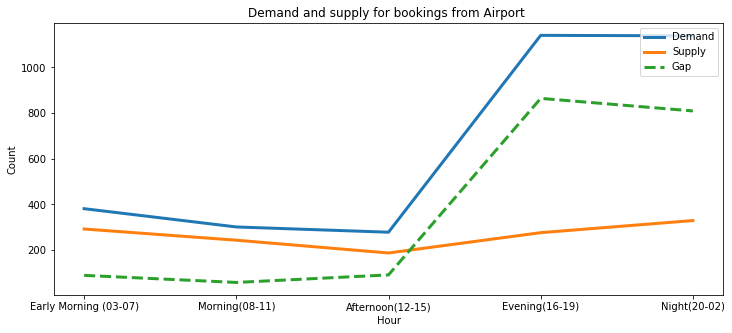

In [34]:
#demand and supply for bookings from Airport
total_demand_air = [381,301,278,1140,1138]
total_supply_air = [total_demand_air[i] - cncld_air[i] -no_cars_avail_air[i] for i in range(5)]
total_gap_air = [no_cars_avail_air[i] + cncld_air[i] for i in range(5)]

plt.figure(figsize = [12,5])
plt.plot(daytime_grp, total_demand_air,linewidth= 3)
plt.plot(daytime_grp, total_supply_air,linewidth= 3)
plt.plot(daytime_grp, total_gap_air,linewidth= 3, linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(["Demand", "Supply" ,"Gap"] ,loc = 1)
plt.title("Demand and supply for bookings from Airport ")

<ul>
    <li>The graph shown here plots the Demand, 
        supply and the gap between the two for 
        the rides from the Airport w.r.t time 
        slots.</li>
    <li>As we can see there is small decrease in 
        the number of bookings from morning to 
        afternoon and sharp increase from 
        almost 360 to 1140 in the evening and 
        stays the same till night.</li>
    <li>76.64% of the rides were completed in 
        early morning time.</li>
    <li>24.21% rides were completed in evening 
        time slot</li> 
    <li>Only 27.67% of the rides were completed at night. </li>
    <li>We can see almost 50% decrement in completing the rides.</li>
    <li>The demand at night and evening were 1140 and the supply was just around 280 and 
        330 respectively.</li>
    <li>There is a large gap of almost 800-850 at this time and this could bring more revenue 
        to the company.</li>
    <li>We can use the same analysis we used before for this.</li>
</ul>


In [35]:
#demand and supply for bookings from City
urd[urd["Pickup point"]== "City"]["Daytime"].value_counts()

Early Morning    1163
Morning           967
Night             584
Evening           420
Afternoon         373
Name: Daytime, dtype: int64

In [36]:
#demand and supply for bookings from City
total_demand_city = [1163,967,373,420,584]
total_supply_city = [total_demand_city[i]  - cncld_city[i] - no_cars_avail_city[i] for i in range(5)]
total_gap_city = [cncld_city[i] + no_cars_avail_city[i]  for i in range(5)]

Text(0.5, 1.0, 'Demand and supply for bookings from City')

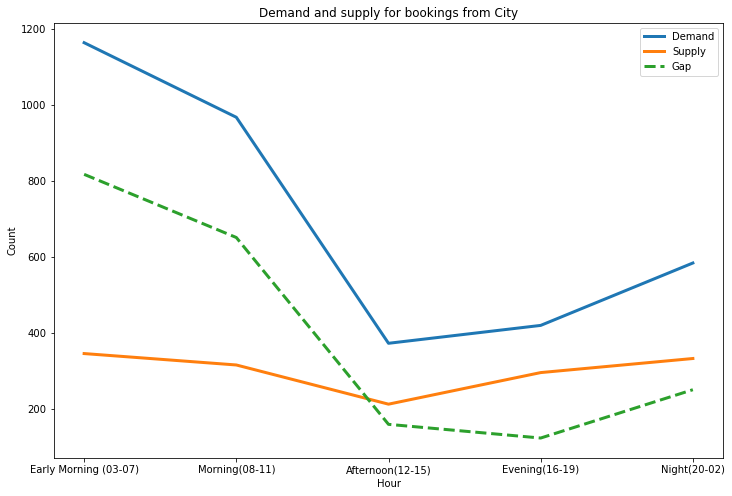

In [37]:
plt.figure(figsize = [12,8])
plt.plot(daytime_grp, total_demand_city,linewidth= 3)
plt.plot(daytime_grp, total_supply_city,linewidth= 3)
plt.plot(daytime_grp, total_gap_city,linewidth= 3, linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(["Demand", "Supply" ,"Gap"] ,loc = 1)
plt.title("Demand and supply for bookings from City")

<ul>
    <li>The graph shown here plots the Demand, 
            supply and the gap between the two for 
            the rides from the City to the Airport w.r.t 
            time slots.</li>
    <li>here is a lot of demand at early 
        morning(1168) and morning (967) time 
        slots.</li>
    <li>Then the requirement decreases till 
        afternoon and again there is small
        increase ill night gradually.
    <li>In the early morning time slots only 
        31.81% rides are completed and the rest 
        69.19% were not completed due to 
        cancellation and no cars availability.
    <li>Initially the gap was high and got less till
        evening and being the minimum at evening, and increased a bit at night . 
    <li>At night 57.02% of the rides were completed and 42.98% didn’t happen due to cancellation and non 
        availability of cars.</li>
    <li>Overall an average of 51.08 % of the rides did not happen due to cancellation and non availability of 
        cars from the city to airport in the given time frame of the data set.</li>
</ul>


In [38]:
total_demand = [1544,1268,651,1560,1722]
total_supply = [total_demand[i] - cncld_air[i] - cncld_city[i] - no_cars_avail_air[i] - no_cars_avail_city[i] for i in range(5)]
total_supply
total_gap = [total_demand[i] - total_supply[i] for i in range(5)]
total_gap

[906, 709, 251, 988, 1060]

Text(0.5, 1.0, 'Demand and supply for overall bookings ')

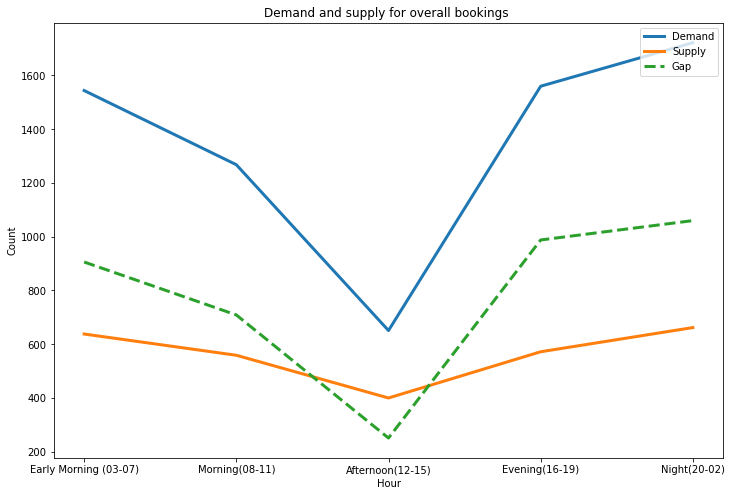

In [39]:
plt.figure(figsize = [12,8])
plt.plot(daytime_grp, total_demand,linewidth= 3)
plt.plot(daytime_grp, total_supply,linewidth= 3)
plt.plot(daytime_grp, total_gap,linewidth= 3, linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(["Demand", "Supply" ,"Gap"] ,loc = 1)
plt.title("Demand and supply for overall bookings ")

<ul>
    <li>We can see from the graph that
        there is high demand for cabs in
        Early morning and night.</li>
    <li>Less number of people get cabs in
        the same time slot.</li>
    <li>59.58% of the requirement is not
        met due of both cancellation and
        non availability of cabs in the early
        morning time slots in overall trips.</li>
    <li>It can be seen that 58.07% of the
        requirement is also not met at
        night in the overall trips.</li>
    <li>In afternoon slot 35.48% demand
        wasn’t met and 64.52% were
        fulfilled as there were less number
        of demands compared to other
        time slots.</li>
    <li>The overall supply wasn’t having large variations as much as demand had.</li>
    <li>This shows us that there are almost same number of drivers available.</li>


In [40]:
total_cancel = [cncld_air[i] + cncld_city[i] for i in range(5)]
total_no_cars = [no_cars_avail_city[i] + no_cars_avail_air[i] for i in range(5)]
print(total_cancel)
print(total_no_cars)
print(sum(total_no_cars))
print(sum(total_cancel))
print(sum(total_supply))


[543, 430, 69, 105, 117]
[363, 279, 182, 883, 943]
2650
1264
2831


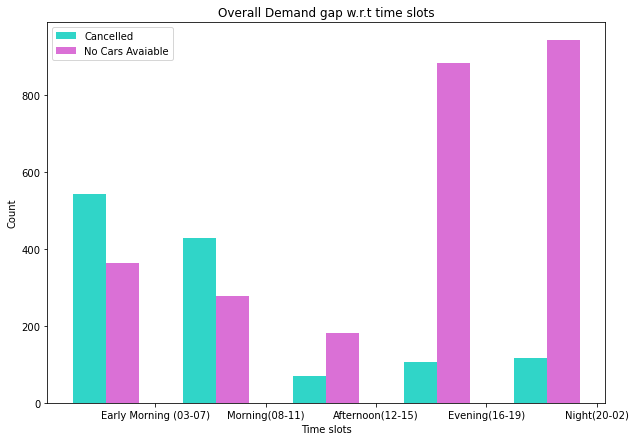

In [41]:
#overall demand and supply based on non availablity of cars and cancellation

xx = np.arange(5)
plt.figure(figsize =[10,7])
plt.bar(xx,total_cancel, width = 0.3,color = "#30D5C8")
plt.bar(xx + 0.3,total_no_cars, width = 0.3,color = "#DA70D6")
plt.xticks([i + 0.6 for i in range(5)], daytime_grp)
plt.legend(["Cancelled","No Cars Avaiable"])
plt.xlabel("Time slots")
plt.ylabel("Count")
plt.title("Overall Demand gap w.r.t time slots")
plt.show()

<ul> 
    <li>The major reason for most of the rides that did not
        happen is due to Non availability of cars.</li>
    <li>Out of the all the rides that didn't happen, 67.70%
        were due to Non availability of cars and the rest
        i.e., 32.30% didn’t happen due to cancellation of
        rides by the driver.</li>
    <li>We need more number of cabs to the company to
        solve this major problem (non availability of cars).
    <li>We have to make sure there are cabs available at
        the airport at evening and night as the demand is
        more at that time near airports.</li>
</ul>

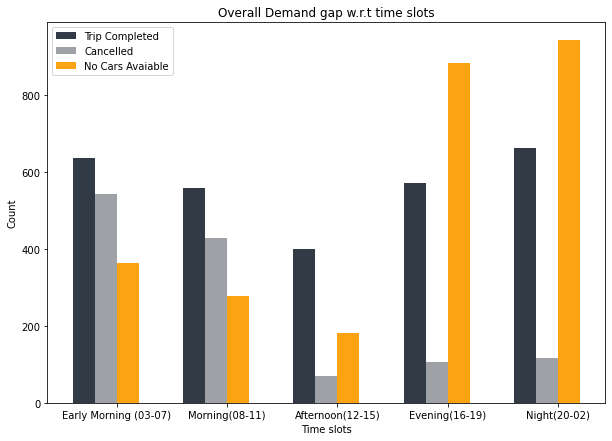

In [42]:
#overall demand and supply based on non availablity of cars and cancellation

xx = np.arange(5)
plt.figure(figsize =[10,7])
plt.bar(xx, total_supply, width = 0.2, color = "#323A45")
plt.bar(xx+0.2,total_cancel, width = 0.2,color = "#9EA1A5")
plt.bar(xx + 0.4,total_no_cars, width = 0.2,color = "#FCA311")
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
plt.legend(["Trip Completed","Cancelled","No Cars Avaiable"])
plt.xlabel("Time slots")
plt.ylabel("Count")
plt.title("Overall Demand gap w.r.t time slots")
plt.show()

<ul>
    <li>At every time slot except at afternoon the number
of rides that didn’t happen is greater than rides
        that got completed.</li>
    <li>In early morning and morning the major reason for
        rides that didn’t happen is because of
        cancellation.</li>
    <li>From Afternoon till Night Non availability of cars
        was the reason for that rides that couldn’t get to
        the user.</li>
    <li>58.02% of total users requirement were not
        completed due to Cancellation and Non
        availability of cars in both the trips.</li>
    <li>Adding new cabs to the company can bring a huge
        difference in the income for the company.</li>
    <li>We can make a separate Category like Airport
        services in the app and can put few drivers only
        for that duty.</li>
    <li>We can also make pre-bookings and schedule
        drivers for the same so that drivers need not wait
        near the airport for next customers.</li>
</ul>


In [43]:
total_rej = [total_cancel[i] + total_no_cars[i] for i in range(5)]
sum(total_rej)

3914

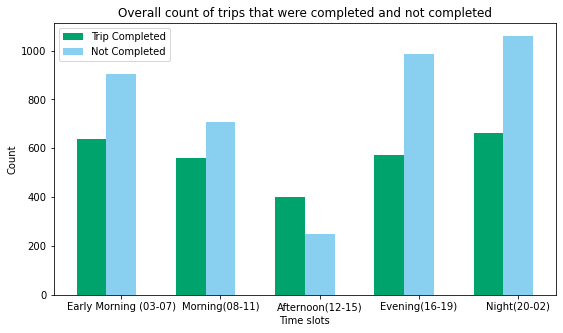

In [44]:

plt.figure(figsize=[9,5])
plt.bar(xx , total_supply, width = 0.3, color = "#00A36C")
plt.bar(xx +0.3, total_rej, width= 0.3,color ="#89CFF0")
plt.xticks([i + 0.3 for i in range(5)], daytime_grp)
plt.legend(["Trip Completed","Not Completed"])
plt.xlabel("Time slots")
plt.ylabel("Count")
plt.title("Overall count of trips that were completed and not completed")
plt.show()


<ul>
    <li>Adding new cabs to the company can bring a huge
        difference in the income for the company.</li>
    <li>We can make a separate Category like Airport
        services in the app and can put few drivers only
        for that duty.</li>
    <li>We can also make pre-bookings and schedule
        drivers for the same so that drivers need not wait
        near the airport for next customers.</li>
</ul>
